In [129]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# !pip install xgboost --quiet
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 55  ## You will pass it to every sklearn call so we ensure reproducibility

In [130]:
df = pd.read_csv("heart.csv")

In [131]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [132]:
cat_variables = [
    'Sex',
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

In [133]:
# help(pd.get_dummies)

In [134]:
df = pd.get_dummies(data=df, prefix=cat_variables, columns=cat_variables)

In [135]:
print(df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

In [136]:
print(len(df.columns))

21


In [137]:
var = [x for x in df.columns if x not in 'HeartDisease']

In [138]:
print(len(var))
print(var)

20
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [139]:
X_train, X_test, y_train, y_test = train_test_split(df[var], df['HeartDisease'], train_size=0.8,
                                                    random_state=RANDOM_STATE)

In [140]:
print(f'train samples:{len(X_train)}\n test samples:{len(X_test)}')
print(f'target proportion:{sum(y_train) / len(y_train):.4f}')

train samples:734
 test samples:184
target proportion:0.5518


In [141]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

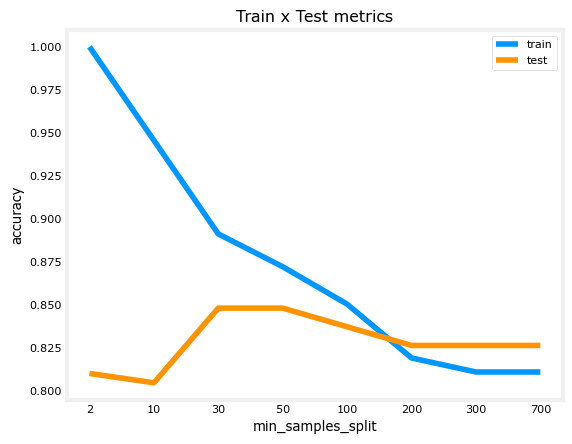

In [142]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    
    model=DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title("Train x Test metrics")
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['train', 'test'])  

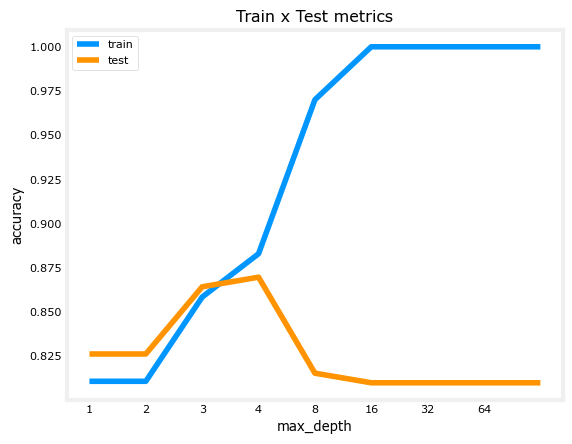

In [143]:
accuracy_list_train=[]
accuracy_list_test=[]
for max_depth in max_depth_list:
    
    model=DecisionTreeClassifier(max_depth=max_depth,random_state=RANDOM_STATE).fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title("Train x Test metrics")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['train', 'test'])  

In [145]:
decision_tree_model=DecisionTreeClassifier(max_depth=3,min_samples_split=50,random_state=RANDOM_STATE).fit(X_train,y_train)

In [146]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]